In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2021-12-28 06:43:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 173.194.211.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   183MB/s    in 0.4s    

2021-12-28 06:43:05 (183 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'

In [3]:
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data') #압축 풀기

In [4]:
zip_ref.close()

In [6]:
# 경로 지정하기

base_dir = './data/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

./data/cats_and_dogs_filtered/train/cats
./data/cats_and_dogs_filtered/train/dogs


In [7]:
# 테스트에 사용되는 고양이/ 개 이미지 경로

validation_cats_dir  = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

./data/cats_and_dogs_filtered/validation/cats
./data/cats_and_dogs_filtered/validation/dogs


In [8]:
# 데이터 셋 살펴보기

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
print(train_cat_fnames[:5])

['cat.240.jpg', 'cat.181.jpg', 'cat.461.jpg', 'cat.844.jpg', 'cat.426.jpg']


In [9]:
len(train_cat_fnames)

1000

In [10]:
# 이미지 확인하기

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

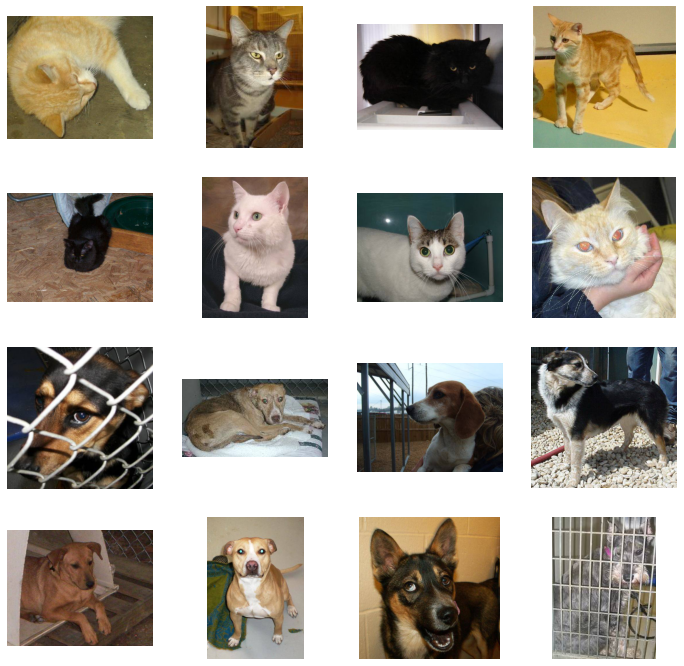

In [13]:
nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [15]:
# 모델 구성하기

import tensorflow as tf
from tensorflow.keras.models import Sequential

model = Sequential([
  tf.keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape = (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 64)       0

In [22]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [24]:
# 이미지 데이터 전처리하기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 데이터를 255로 나눠주기
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150,150))

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
# 모델 훈련하기
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100, # 훈련에 사용되는 배치개수
                    epochs=50,
                    validation_steps=50, # 테스트에 사용되는 배치 개수
                    verbose=2)

Epoch 1/50
100/100 - 73s - loss: 0.6838 - accuracy: 0.6145 - val_loss: 0.8031 - val_accuracy: 0.5200 - 73s/epoch - 725ms/step
Epoch 2/50
100/100 - 85s - loss: 0.5883 - accuracy: 0.6880 - val_loss: 0.5772 - val_accuracy: 0.6990 - 85s/epoch - 848ms/step
Epoch 3/50
100/100 - 59s - loss: 0.5057 - accuracy: 0.7455 - val_loss: 0.6067 - val_accuracy: 0.6710 - 59s/epoch - 592ms/step
Epoch 4/50
100/100 - 60s - loss: 0.4195 - accuracy: 0.8010 - val_loss: 0.6444 - val_accuracy: 0.7060 - 60s/epoch - 601ms/step
Epoch 5/50
100/100 - 58s - loss: 0.3244 - accuracy: 0.8555 - val_loss: 0.6745 - val_accuracy: 0.7210 - 58s/epoch - 583ms/step
Epoch 6/50
100/100 - 59s - loss: 0.2177 - accuracy: 0.9100 - val_loss: 0.8661 - val_accuracy: 0.6770 - 59s/epoch - 585ms/step
Epoch 7/50
100/100 - 58s - loss: 0.1458 - accuracy: 0.9455 - val_loss: 0.9823 - val_accuracy: 0.6970 - 58s/epoch - 583ms/step
Epoch 8/50
100/100 - 58s - loss: 0.0935 - accuracy: 0.9635 - val_loss: 1.0761 - val_accuracy: 0.7190 - 58s/epoch - 584

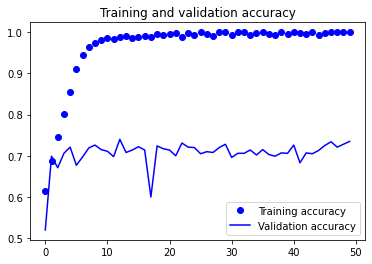

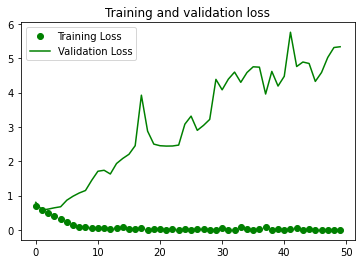

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()